In [534]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_auc_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [535]:
data = pd.read_csv('Covid_patients12.csv')

In [536]:
data

,EDLOSbin,EDLengthofStayInHrs,PatientRace,PatientSex,ArrivalMethod,EdDisposition,DischargeDisposition,AcuityLevel,PatientClass,Bed Assigned,...,HIV,Asthma,HTN,Transplant,LowIncome,obese,SBP,HR,RR,Spo2
0,1,10,Black,Male,Car,Admit,Expired,2 - Emergent,Inpatient,1,...,0,0,1,1,0,0,193,70,22,97
1,1,13,White,Male,Other,Admit,Home or Self Care,2 - Emergent,Inpatient,1,...,0,0,0,0,0,1,127,108,24,95
2,0,3,Black,Female,Car,Admit,Home or Self Care,2 - Emergent,Inpatient,1,...,0,0,0,0,1,1,113,109,20,94
3,1,14,Other,Male,Ambulance,Admit,Expired,1 - Immediate,Inpatient,1,...,0,0,1,0,0,1,139,111,37,83
4,1,18,Black,Male,Car,Admit,Home or Self Care,2 - Emergent,Inpatient,1,...,0,1,1,0,1,1,117,101,22,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,1,6,Black,Male,Other,Admit,Expired,2 - Emergent,Inpatient,1,...,0,0,1,0,1,1,116,86,17,95
532,1,19,White,Male,Ambulance,Admit,Home or Self Care,3 - Urgent,Inpatient,1,...,0,0,0,0,0,0,133,72,18,99
533,1,15,White,Male,Ambulance,Admit,Skilled Nursing Facility,1 - Immediate,Inpatient,1,...,0,0,1,0,0,0,194,79,24,96
534,0,1,White,Male,Ambulance,Discharge,Home or Self Care,2 - Emergent,Emergency,0,...,0,0,0,0,0,1,151,113,20,99


In [705]:
corr = data.corr()
print(corr.EDLOSbin)

EDLOSbin               1.000000
EDLengthofStayInHrs    0.698427
Bed Assigned           0.301384
Physician             -0.056645
Registered Nurse      -0.010860
ESI                   -0.106237
Age                    0.132275
Temp                  -0.047154
BMI                   -0.021284
Resp_failure           0.110473
Sepsis                 0.110935
O2_Flow                0.174495
MI                     0.034109
CAD                    0.068025
CHF                    0.028520
PVD                    0.020195
Stroke                 0.091044
Dementia               0.078734
COPD                   0.036529
Rheum                  0.050113
PepUlc                 0.044981
Liver                 -0.025659
DM                     0.118496
CKD                    0.163800
ESRD                   0.083381
Cancer                 0.025136
HIV                    0.050113
Asthma                -0.011845
HTN                    0.135678
Transplant             0.096052
LowIncome              0.054788
obese   

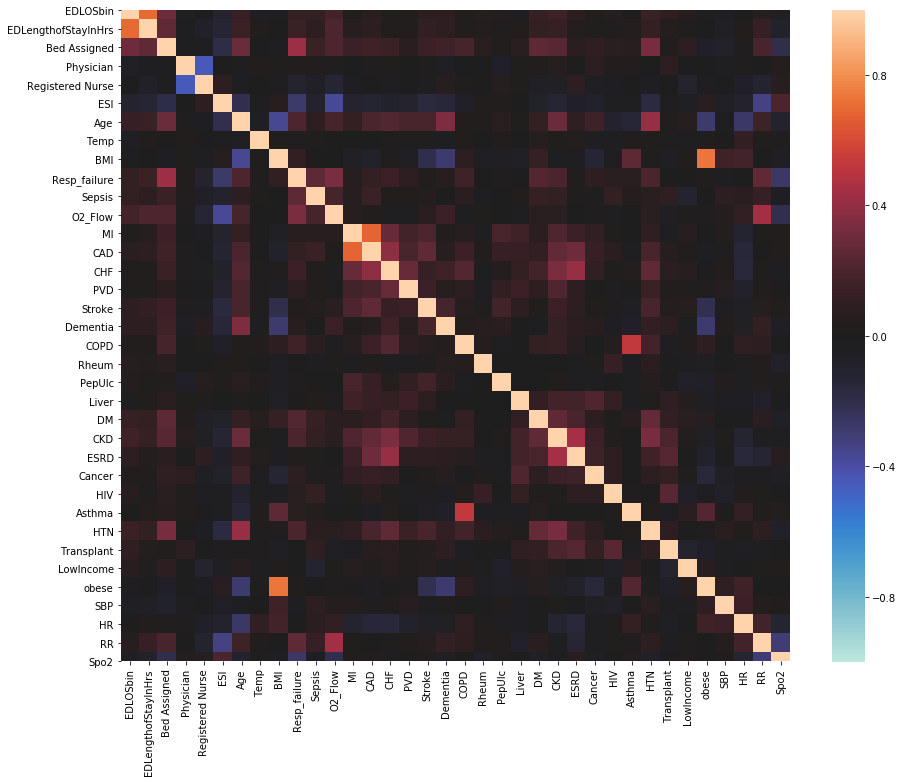

In [720]:
# Scatterplot Matrix
import seaborn as sns
#sns.pairplot(data.loc[:, ['O2_Flow', 'CKD', 'CHF', 'DM', 'HTN', 'Resp_failure', 'Registered Nurse', 'Bed Assigned', 'Physician', 
                          #'Spo2', 'RR', 'HR', 'SBP', 'Asthma', 'Cancer']], palette="Set2")
#mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 12))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    square=True)

In [538]:
def temp(x):
    if x > 100.4:
        return "High"
    if x < 97:
        return "Low"
    return "Mild"

In [539]:
data.Temp.apply(temp)

0      Mild
1      High
2      High
3      Mild
4      Mild
       ... 
531    Mild
532    Mild
533     Low
534    Mild
535    Mild
Name: Temp, Length: 536, dtype: object

In [540]:
X = data.loc[:, ['O2_Flow', 'CKD', 'CHF', 'DM', 'HTN', 'Resp_failure', 'Registered Nurse','Sepsis', 'Stroke', 'ESI', 'Bed Assigned', 'Physician']]
X = pd.concat([X, pd.get_dummies(data.loc[:, 'Age Group'])], axis=1)
X = pd.concat([X, pd.get_dummies(data.Temp.apply(temp))], axis=1)
y = data.EDLOSbin

In [541]:
X

,O2_Flow,CKD,CHF,DM,HTN,Resp_failure,Registered Nurse,Sepsis,Stroke,ESI,...,30-39,40-49,50-59,60-69,70-79,80-89,90+,High,Low,Mild
0,1,1,1,1,1,1,1,1,0,2,...,0,0,0,0,0,1,0,0,0,1
1,2,0,0,0,0,0,1,0,0,2,...,1,0,0,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,1,0,0
3,30,0,0,1,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,3,0,0,1,1,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2,0,1,1,1,0,1,0,1,2,...,0,0,0,0,0,1,0,0,0,1
532,6,0,0,1,0,1,1,0,0,3,...,0,0,1,0,0,0,0,0,0,1
533,3,1,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
534,2,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,0,1


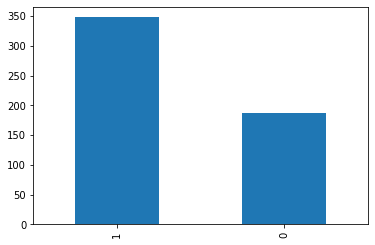

In [542]:
y.value_counts().plot.bar()

In [543]:
# oversample data:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversample.fit_resample(X, y)

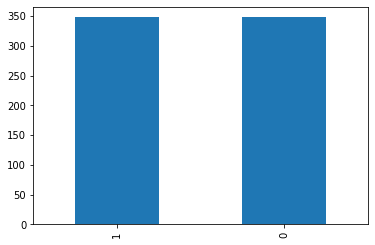

In [544]:
y_resampled.value_counts().plot.bar()

In [701]:
X_train, X_test, y_train, y_test = train_test_split(
    X.dropna(axis=1), y, test_size=0.33, stratify=y)

#ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

In [546]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [547]:
columns = ['20-29','40-49', 'Bed Assigned','Physician','HTN','CKD','DM','High', 'O2_Flow']

In [548]:
#'20-29','40-49', 'Yes','HTN','CKD','DM','High', 'O2_Flow', 'ESI'

In [555]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_resampled.loc[:, columns].dropna(axis=1), y_resampled)
print(accuracy_score(tree.predict(X_test.loc[:, columns].dropna(axis=1)), y_test))

0.751412429378531


In [556]:
print(classification_report(tree.predict(X_test.loc[:, columns].dropna(axis=1)), y_test))

              precision    recall  f1-score   support

           0       0.44      0.75      0.55        36
           1       0.92      0.75      0.83       141

    accuracy                           0.75       177
   macro avg       0.68      0.75      0.69       177
weighted avg       0.82      0.75      0.77       177



[]

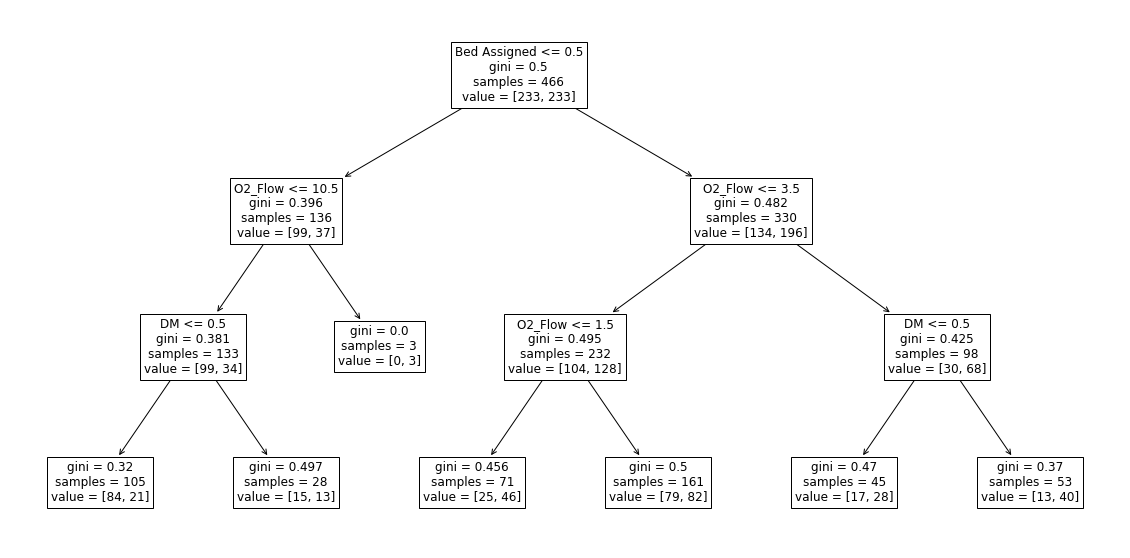

In [557]:
plt.figure(figsize=(20,10))
plot_tree(tree, fontsize=12, feature_names=columns)
plt.plot()

In [644]:
import numpy as np

In [645]:
preds = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42)

#ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

for col in X_resampled.columns:
    tree = DecisionTreeClassifier(max_depth=1)
    mask = np.squeeze(~X_resampled.loc[:, [col]].isna().values)
    
    tree.fit(X_resampled.loc[mask, [col]], y_resampled.loc[mask])
    
    mask = np.squeeze(~X_test.loc[:, [col]].isna().values)
    preds.append([col, accuracy_score(tree.predict(X_test.loc[mask, [col]]), y_test.loc[mask])])

In [646]:
pd.DataFrame(preds, columns=['predictor', 'accuracy']).sort_values(by='accuracy', ascending=False)

,predictor,accuracy
10,Bed Assigned,0.689266
13,20-29,0.655367
14,30-39,0.621469
0,O2_Flow,0.615819
16,50-59,0.598870
3,DM,0.587571
4,HTN,0.576271
5,Resp_failure,0.508475
11,Physician,0.497175
1,CKD,0.485876


In [688]:
cols = ['Bed Assigned','20-29','30-39','O2_Flow','40-49','Registered Nurse','High','ESI','Sepsis','Physician']
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_resampled.loc[:, cols], y_resampled)
print(classification_report(tree.predict(X_test.loc[:, cols]), y_test))

              precision    recall  f1-score   support

           0       0.39      0.65      0.48        37
           1       0.89      0.73      0.80       140

    accuracy                           0.71       177
   macro avg       0.64      0.69      0.64       177
weighted avg       0.78      0.71      0.73       177



[]

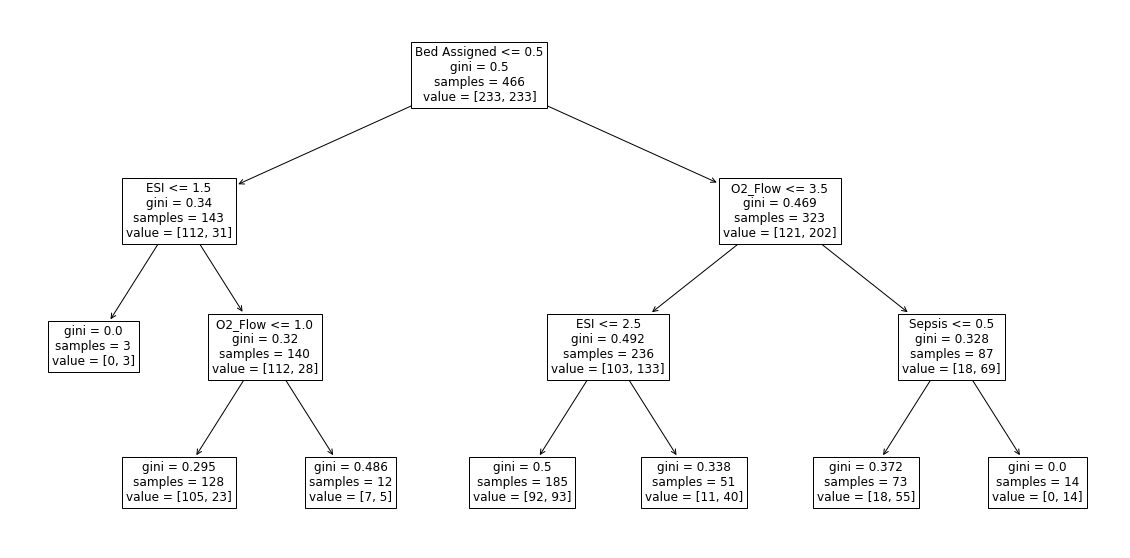

In [689]:
plt.figure(figsize=(20,10))
plot_tree(tree, fontsize=12, feature_names=cols)
plt.plot()

In [690]:
#'20-29','Bed Assigned', 'High', '30-39','ESI','70-79','CHF','Low','Mild','Stroke'
#'20-29','40-49', 'Bed Assigned','Physician','HTN','CKD','DM','High', 'O2_Flow'
#'Bed Assigned','20-29','30-39','O2_Flow','40-49','Registered Nurse','High','Physician' @67%
